In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os 

In [3]:
df = pd.read_csv('filtered_data_pivot.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 21 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Country                                                                    9 non-null      object
 1   Year                                                                       9 non-null      int64 
 2   R&D                                                                        9 non-null      object
 3   Acts involving the movement of dumping of waste                            8 non-null      object
 4   Acts that cause environmental pollution or degradation                     7 non-null      object
 5   Acts that result in the depletion of degradation of natural resources      6 non-null      object
 6   Burglary                                                              

In [12]:
df.columns

Index(['Country', 'Year', 'R&D',
       'Acts involving the movement of dumping of waste',
       'Acts that cause environmental pollution or degradation',
       'Acts that result in the depletion of degradation of natural resources',
       'Burglary', 'Corruption', 'Corruption: Bribery',
       'Corruption: Other acts of corruption', 'Fraud',
       'Fraud: Cyber-related (Cy)', 'Money laundering',
       'Smuggling of migrants', 'Theft', 'Theft: of a motorized vehicle',
       'Trade or possession of protected or prohibited species of faune and flora',
       'Unlawful access to a computer system',
       'Unlawful interception or access of computer data',
       'Unlawful interference with a computer system or computer data',
       'Acts against public safety and state security', 'Cyber_crimes'],
      dtype='object')

In [60]:
#df['Acts against public safety and state security'] = df['Acts against public safety and state security'].str.replace(',','.')
#df['Fraud: Cyber-related (Cy)'] = df['Fraud: Cyber-related (Cy)'].str.replace(',','.')
#df[['Acts against public safety and state security','Fraud: Cyber-related (Cy)']] = df[['Acts against public safety and state security','Fraud: Cyber-related (Cy)']].astype('int64')
#df['R&D']=df['R&D'].str.replace(',','.')
df['R&D']=df['R&D'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Country                                                                    8 non-null      object 
 1   Year                                                                       8 non-null      int64  
 2   R&D                                                                        8 non-null      float64
 3   Acts involving the movement of dumping of waste                            8 non-null      object 
 4   Acts that cause environmental pollution or degradation                     7 non-null      object 
 5   Acts that result in the depletion of degradation of natural resources      6 non-null      object 
 6   Burglary                                                           

In [38]:
df['Cyber_crimes'] = df['Fraud: Cyber-related (Cy)'] + df['Acts against public safety and state security']


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Country                                                                    8 non-null      object
 1   Year                                                                       8 non-null      int64 
 2   R&D                                                                        8 non-null      object
 3   Acts involving the movement of dumping of waste                            8 non-null      object
 4   Acts that cause environmental pollution or degradation                     7 non-null      object
 5   Acts that result in the depletion of degradation of natural resources      6 non-null      object
 6   Burglary                                                                   

In [56]:
df[['Year','R&D','Acts against public safety and state security','Cyber_crimes','Fraud: Cyber-related (Cy)']]

,Year,R&D,Acts against public safety and state security,Cyber_crimes,Fraud: Cyber-related (Cy)
0,2014,34.5,10385,33927,23542
1,2015,35.6,8898,35276,26378
2,2016,48.0,9550,42630,33080
3,2017,46.5,9430,55508,46078
4,2018,45.2,12042,72153,60111
5,2019,45.5,14915,93458,78543
6,2020,44.1,17990,116607,98617
7,2021,45.4,20103,141601,121498


In [63]:
df_cleaned = df[~pd.isna(df.Cyber_crimes)]

In [64]:
df_cleaned=df_cleaned.iloc[2:]

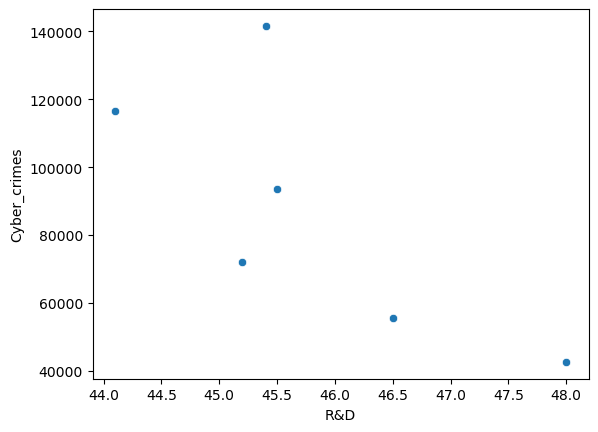

In [65]:
sns.scatterplot(x='R&D', y='Cyber_crimes', data=df_cleaned)
plt.show()

In [66]:
#Regressione lineare
import statsmodels.api as sm
Y = df['Cyber_crimes']
X = df['R&D'] 
X = sm.add_constant(data=X)   # add a constant to the model
model = sm.OLS(endog=Y,exog=X)
results = model.fit()

C:\Users\Beatrice\miniconda3\envs\Boolean\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cyber_crimes   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1.624
Date:                Mon, 03 Feb 2025   Prob (F-statistic):              0.250
Time:                        16:57:02   Log-Likelihood:                -94.632
No. Observations:                   8   AIC:                             193.3
Df Residuals:                       6   BIC:                             193.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.205e+04   1.23e+05     -0.666      0.530   -3.83e+05    2.19e+05
R&D         3618.2057   2838.967      1.274      0.250   -3328.496    1.06e+04
==============================================================================
Omnibus:                        0.483   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.435
Skew:                           0.413   Prob(JB):                        0.804
Kurtosis:                       2.211   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

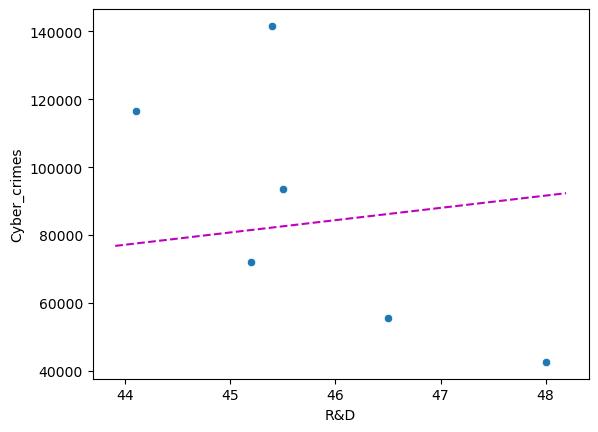

In [67]:
#Assigning intercept and slope from the summary
intercept = -8.205e+04	
slope= 3618.2057
# plot the data points using a scatter plot
sns.scatterplot(x='R&D', y='Cyber_crimes', data=df_cleaned)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='m')   # draw the regression line on top of the scatter plot

In [ ]:
Il modello predittivo è stato scartato per i seguenti motivi:

numero troppo esiguo di records
conseguenzialmente gli errori relativi sono troppo elevati per considerare una previsione affidabile